# **About the dataset:**

The dataset comprises 2,546 entries across five main columns: name, ratings, price, imgURL, and corpus. Here's a summary of each column:

**name:** Represents the name of the mobile device, with 2,134 unique names indicating a diverse range of devices. The most frequent device listed is "OPPO Reno10 5G (Ice Blue, 256 GB)", appearing 14 times.

**ratings:** This column provides the user ratings for each device, ranging from 2.9 to 5.0. The average rating is approximately 4.30, reflecting generally favorable reviews.

**price:** Prices are listed as strings, which suggests that they might include currency symbols or other non-numeric characters, with 758 unique price points. The most common price listed is "16999", appearing 59 times.

**imgURL:** Contains URLs for images of the mobile devices, with 1,674 unique URLs. Some URLs are repeated, indicating multiple listings might share the same image.

**corpus:** This text column contains various specifications and features extracted from the product descriptions, such as storage capacity and system type. Out of 2,546 entries, 2,534 are non-null, suggesting some missing data. There are 1,603 unique entries in this column, which means some products might have similar or identical descriptions.

Overall, the dataset appears to be comprehensive, covering a wide array of mobile devices with a focus on attributes that are useful for making recommendations based on user preferences. The presence of some non-numeric data in price and minor missing data in corpus

In [60]:
import numpy as np
import pandas as pd

# Import dataset
url = "https://raw.githubusercontent.com/Kotha-Nikhil/INFO-6105-Data-Science/main/mobile_recommendation_system_dataset.csv"
df = pd.read_csv(url)

print('Data source import complete.')


# Display the first few rows of the DataFrame
df.head()


Data source import complete.


,name,ratings,price,imgURL,corpus
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,"₹20,999",https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...


In [61]:
# Check the shape of the DataFrame
shape = df.shape

# Check for missing values
missing_values = df.isnull().sum()

shape, missing_values


((2546, 5),
 name        0
 ratings     0
 price       0
 imgURL      0
 corpus     12
 dtype: int64)

Note: There are missing values in corpus

In [62]:
# Remove the rows with missing values
df_clean = df.dropna()

# Check the shape of the cleaned DataFrame
clean_shape = df_clean.shape

# Check for missing values in the cleaned DataFrame
clean_missing_values = df_clean.isnull().sum()

clean_shape, clean_missing_values


((2534, 5),
 name       0
 ratings    0
 price      0
 imgURL     0
 corpus     0
 dtype: int64)

Note: We are handling the missing values by dropping them since there are very few values

In [63]:
import re

def extract_storage(corpus):
    """Extract the storage capacity from the corpus."""
    match = re.search(r'Storage(\d+)', corpus)
    if match:
        return int(match.group(1))
    return None

# Apply the function to the 'corpus' column
df_clean['Storage'] = df_clean['corpus'].apply(extract_storage)

# Display the first few rows of the DataFrame
df_clean.head()


<ipython-input-63-43424937caa6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Storage'] = df_clean['corpus'].apply(extract_storage)


,name,ratings,price,imgURL,corpus,Storage
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...,128.0
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,"₹20,999",https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...,128.0
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,64.0
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...,256.0
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...,128.0


In [64]:
def extract_ram(corpus):
    """Extract the RAM from the corpus."""
    match = re.search(r'RAM(\d+)', corpus)
    if match:
        return int(match.group(1))
    return None

def extract_system(corpus):
    """Extract the operating system from the corpus."""
    match = re.search(r'System(.*?)Processor', corpus)
    if match:
        return match.group(1).strip()
    return None

def extract_processor(corpus):
    """Extract the processor type from the corpus."""
    match = re.search(r'Processor (.*?) ', corpus)
    if match:
        return match.group(1).strip()
    return None

# Apply the functions to the 'corpus' column
df_clean['RAM'] = df_clean['corpus'].apply(extract_ram)
df_clean['System'] = df_clean['corpus'].apply(extract_system)
df_clean['Processor'] = df_clean['corpus'].apply(extract_processor)

# Display the first few rows of the DataFrame
df_clean.head()


<ipython-input-64-ebc24654a6f3>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['RAM'] = df_clean['corpus'].apply(extract_ram)
<ipython-input-64-ebc24654a6f3>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['System'] = df_clean['corpus'].apply(extract_system)
<ipython-input-64-ebc24654a6f3>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

,name,ratings,price,imgURL,corpus,Storage,RAM,System,Processor
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...,128.0,6.0,Android 12,TypeMediatek
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,"₹20,999",https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...,128.0,6.0,Android Pie 9.0,TypeMediaTek
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,64.0,4.0,Android 11,Speed2.4
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...,256.0,12.0,Android Q 11,TypeQualcomm
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...,128.0,NaN,iOS 15,TypeA15


In [65]:
# Check the unique values for 'System' and 'Processor'
unique_systems = df_clean['System'].unique()
unique_processors = df_clean['Processor'].unique()

unique_systems, unique_processors


(array(['Android 12', 'Android Pie 9.0', 'Android 11', 'Android Q 11',
        'iOS 15', 'iOS 9', 'Android 13', 'Android Pie 9',
        'Android Nougat 7', 'Android 10', 'iOS 16', None,
        'Android Q Android Q 12.5', 'Android Oreo 8.1',
        'Android Marshmallow 6.0.1', 'Android Oreo 8.1.0',
        'Android 13 (Go Edition)', 'Android Android 12', 'Android Q 10',
        'iOS 14.2', 'Android Pie Android v9.0 (Pie)', 'Android Andriod 11',
        'Android Android 10',
        'Android HiOS 8.6 based on Android 12-Go Edition',
        'Android Nougat 7.1', 'iOS 14', 'Android Android 13', 'iOS 12',
        'Android 12 Go', 'iOS 7', 'Android Nougat 7.1.2',
        'Android Oreo V11', 'Android ANdroid 13 OxygenOS',
        'Android Android 13.0', 'Android Android v12.0',
        'Android Android 11', 'Android Pie 10', 'Android Oreo 8.0', 'Q 10',
        'Android Q ANDROID 10', 'Android Q 12', 'iOS 13',
        'Android Android 11 Go', 'Android 10 (Go Edition)',
        'Android Oxy

In [66]:
def clean_system(system):
    """Clean the system values."""
    if pd.isnull(system):
        return None
    if 'android' in system.lower():
        return 'Android'
    if 'ios' in system.lower():
        return 'iOS'
    if 'tizen' in system.lower():
        return 'Tizen'
    return system

# Apply the function to the 'System' column
df_clean['System'] = df_clean['System'].apply(clean_system)

# Check the unique values for 'System'
unique_systems_clean = df_clean['System'].unique()

unique_systems_clean


<ipython-input-66-f815c3e413bd>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['System'] = df_clean['System'].apply(clean_system)


array(['Android', 'iOS', None, 'Q 10', 'Series 30 Feature phone', '1',
       'Series 30', 'Tizen'], dtype=object)

In [67]:
def clean_processor(processor):
    """Clean the processor values."""
    if pd.isnull(processor):
        return None
    if 'mediatek' in processor.lower():
        return 'MediaTek'
    if 'qualcomm' in processor.lower():
        return 'Qualcomm'
    if 'apple' in processor.lower():
        return 'Apple'
    return 'Other'

# Apply the function to the 'Processor' column
df_clean['Processor'] = df_clean['Processor'].apply(clean_processor)

# Check the unique values for 'Processor'
unique_processors_clean = df_clean['Processor'].unique()

unique_processors_clean

<ipython-input-67-2f1ad03dd602>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Processor'] = df_clean['Processor'].apply(clean_processor)


array(['MediaTek', 'Other', 'Qualcomm', None, 'Apple'], dtype=object)

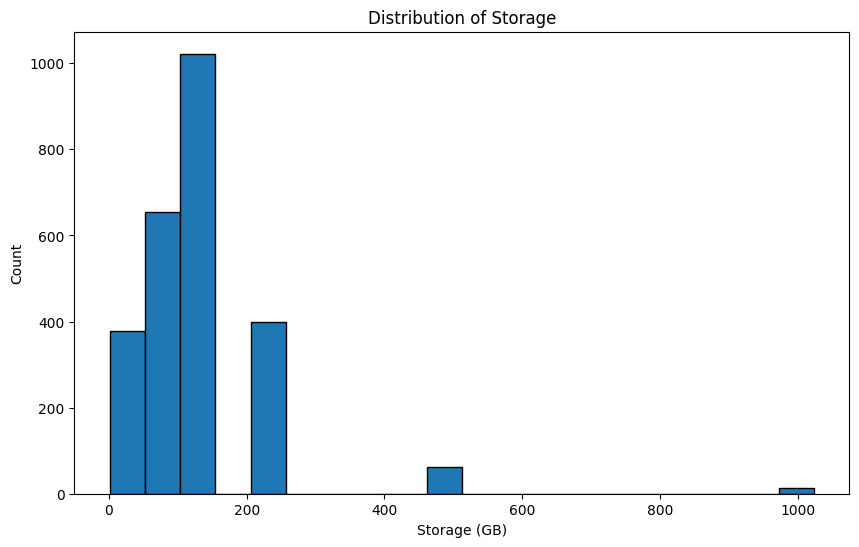

In [68]:
import matplotlib.pyplot as plt

# Plot a histogram of the 'Storage' feature
plt.figure(figsize=(10, 6))
plt.hist(df_clean['Storage'], bins=20, edgecolor='black')
plt.title('Distribution of Storage')
plt.xlabel('Storage (GB)')
plt.ylabel('Count')
plt.show()


**Observations:**

The graph depicts a histogram titled "Distribution of Storage" with storage capacity on the x-axis measured in gigabytes (GB) and the count on the y-axis. Here's what can be observed:

**Modal Class:** The most common storage capacity range, indicated by the highest bar, falls between 50 GB to approximately 150 GB.

**Skewness:** The distribution appears to be right-skewed, with a few devices having a very high storage capacity (notably one bin at around 1000 GB).

**Distribution Shape:** The majority of counts fall within the lower end of the storage spectrum, and the frequency of devices decreases as storage capacity increases.

**Outliers:** The bar at the extreme right suggests there may be a small number of devices with an exceptionally high storage capacity (around 1000 GB), which could be considered outliers.

**Bins:** The histogram is divided into bins, each representing a range of storage capacities. There are significantly fewer counts in the higher storage bins.

**Data Insights:** Most devices seem to offer a moderate amount of storage, with fewer devices offering very high or very low storage capacities.


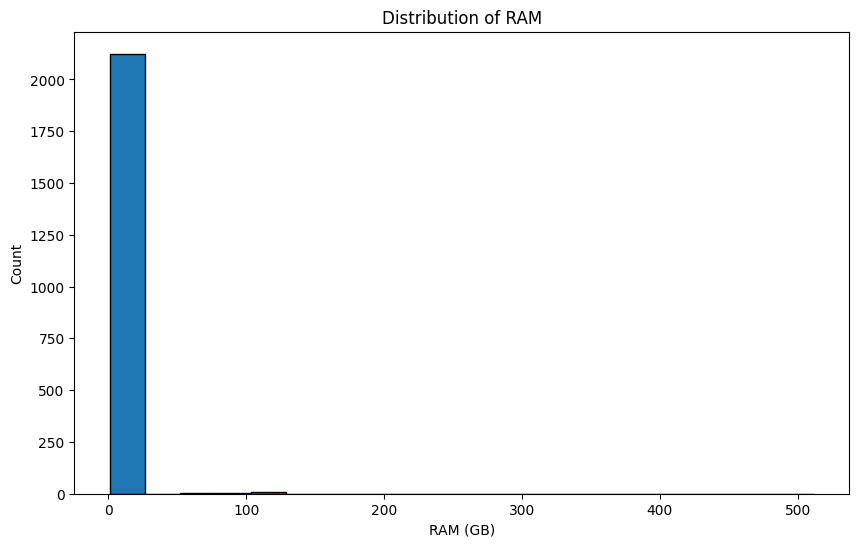

In [69]:
# Plot a histogram of the 'RAM' feature
plt.figure(figsize=(10, 6))
plt.hist(df_clean['RAM'].dropna(), bins=20, edgecolor='black')  # Drop NaN values for the plot
plt.title('Distribution of RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Count')
plt.show()


**Observations:**

The histogram is titled "Distribution of RAM" with RAM on the x-axis measured in gigabytes (GB) and count on the y-axis. Observations include:

A large number of devices have a very small amount of RAM (close to 0 GB), indicated by the tall bar at the far left.

There are virtually no devices with RAM between 50 GB and 500 GB, as shown by the lack of bars beyond the first one.

The distribution is extremely left-skewed with almost all devices concentrated in the first bin.

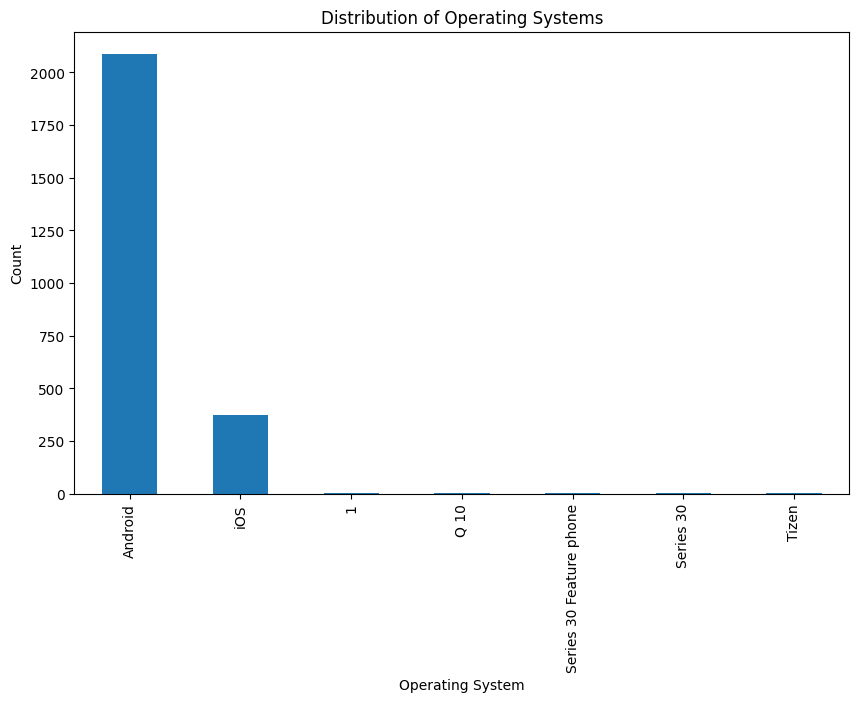

In [70]:
# Plot a bar chart of the 'System' feature
plt.figure(figsize=(10, 6))
df_clean['System'].value_counts().plot(kind='bar')
plt.title('Distribution of Operating Systems')
plt.xlabel('Operating System')
plt.ylabel('Count')
plt.show()


**Observations:**


The histogram shows the distribution of various operating systems. Here are the observations:

Android is the most common operating system, with the highest count by a significant margin.

iOS is the second most common, but with substantially fewer counts than Android.

Other operating systems (labelled as "1", "Q", "Series 30 Feature Phone", "Series 30+", and "Tizen") are present in much smaller numbers.

The "Series 30 Feature Phone", "Series 30+", and "Tizen" operating systems have particularly low counts, almost negligible compared to Android and iOS.

This suggests a strong dominance of Android in the dataset, followed by iOS, with other operating systems having minimal presence.

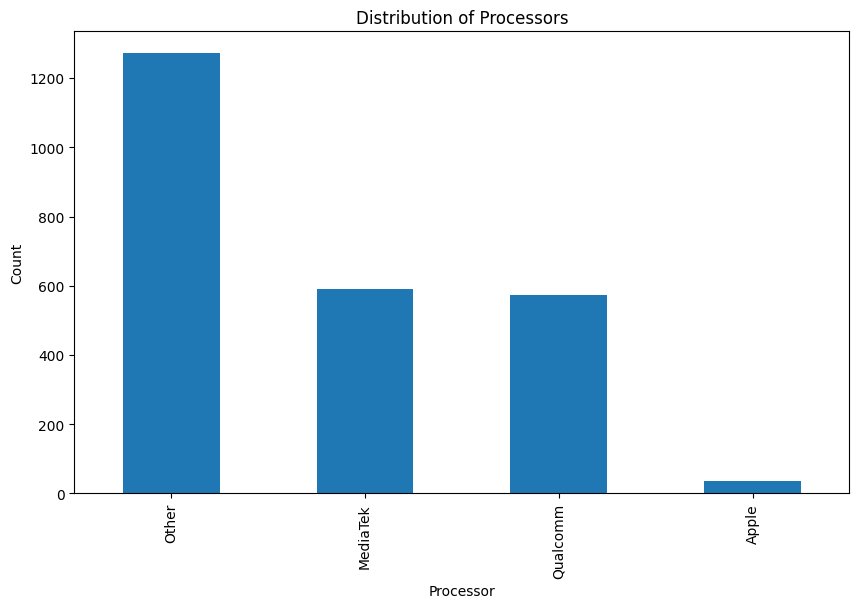

In [71]:
# Plot a bar chart of the 'Processor' feature
plt.figure(figsize=(10, 6))
df_clean['Processor'].value_counts().plot(kind='bar')
plt.title('Distribution of Processors')
plt.xlabel('Processor')
plt.ylabel('Count')
plt.show()


**Observations:**

The histogram presents the distribution of processors across devices:

"Other" processors are the most common, with the count exceeding 1000.

MediaTek and Qualcomm processors are nearly equal in count, each represented by a significant number of devices.

Apple processors have the lowest count, suggesting fewer devices use them compared to the other categories listed.

The chart highlights a diverse processor market with a substantial number of devices not using the main named brands (MediaTek, Qualcomm, Apple), but rather falling into the "Other" category.



In [72]:
def clean_price(price):
    """Clean the price values."""
    # Remove any non-numeric characters
    cleaned_price = re.sub(r'\D', '', price)

    # Convert the remaining value to an integer
    try:
        return int(cleaned_price)
    except ValueError:
        return None

# Apply the function to the 'price' column
df_clean['price'] = df_clean['price'].apply(clean_price)

# Check the first few rows of the DataFrame
df_clean.head()


<ipython-input-72-ee960e62dbf5>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['price'] = df_clean['price'].apply(clean_price)


,name,ratings,price,imgURL,corpus,Storage,RAM,System,Processor
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...,128.0,6.0,Android,MediaTek
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,20999,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...,128.0,6.0,Android,MediaTek
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,64.0,4.0,Android,Other
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...,256.0,12.0,Android,Qualcomm
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...,128.0,NaN,iOS,Other


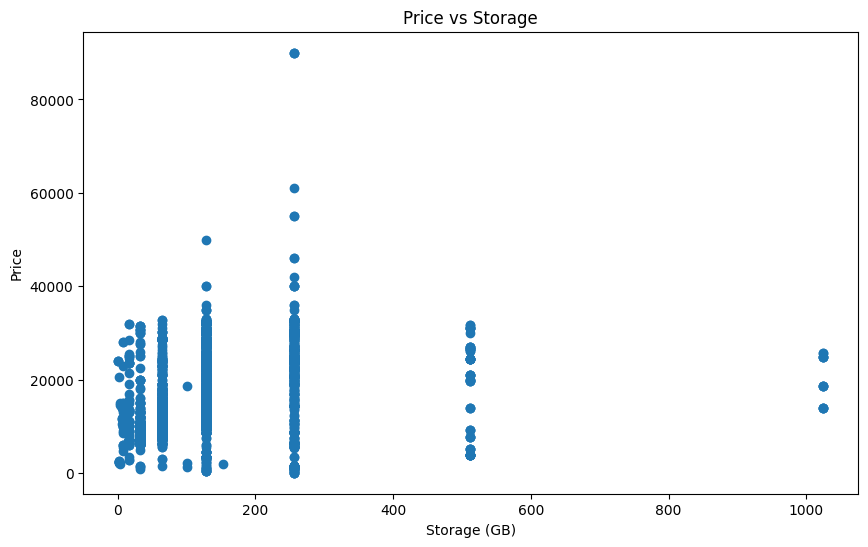

0.2708852261801912

In [73]:
    # Plot a scatter plot of 'price' vs 'Storage'
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['Storage'], df_clean['price'])
plt.title('Price vs Storage')
plt.xlabel('Storage (GB)')
plt.ylabel('Price')
plt.show()

# Calculate the correlation coefficient between 'price' and 'Storage'
correlation = df_clean['price'].corr(df_clean['Storage'])

correlation


**Observations:**


The scatter plot titled "Price vs Storage" shows the relationship between the storage capacity of devices (in GB) and their price:

There are several clusters of points around certain storage values, particularly around 64 GB, 128 GB, and 256 GB, indicating common storage sizes for devices.

The prices for devices with these common storage capacities vary widely, as indicated by the vertical spread of points at these storage markers.

Some devices with high storage capacities (near 1000 GB) are present, and they tend to be at the higher end of the price range.

The most expensive devices do not necessarily have the highest storage, suggesting factors other than storage are also influencing price.

There is a group of devices around 512 GB storage that has a wide price range, similar to lower storage capacities.

The plot suggests that while there is a tendency for higher storage capacities to have higher prices, the relationship is not strictly linear and likely involves other factors.

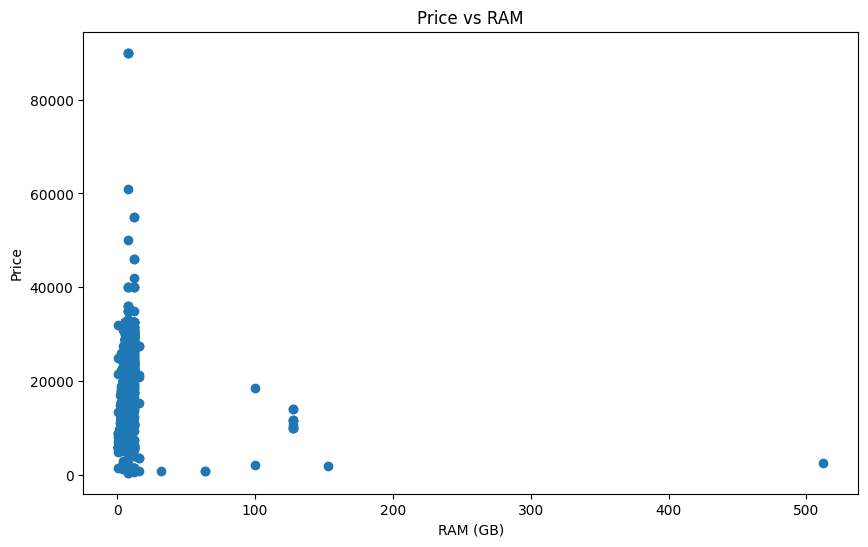

0.029167178591028332

In [74]:
# Plot a scatter plot of 'price' vs 'RAM'
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['RAM'], df_clean['price'])
plt.title('Price vs RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Price')
plt.show()

# Calculate the correlation coefficient between 'price' and 'RAM'
correlation = df_clean['price'].corr(df_clean['RAM'])

correlation


Observations:


The scatter plot titled "Price vs RAM" indicates:

Most devices have RAM amounts clustered near the lower end of the scale, with prices varying greatly.

There are a few devices with very high RAM (likely erroneously labeled in GB instead of MB), with prices across a wide range but some of the highest-priced devices featuring large RAM.

The price does not increase uniformly with RAM, suggesting other factors also influence the price.

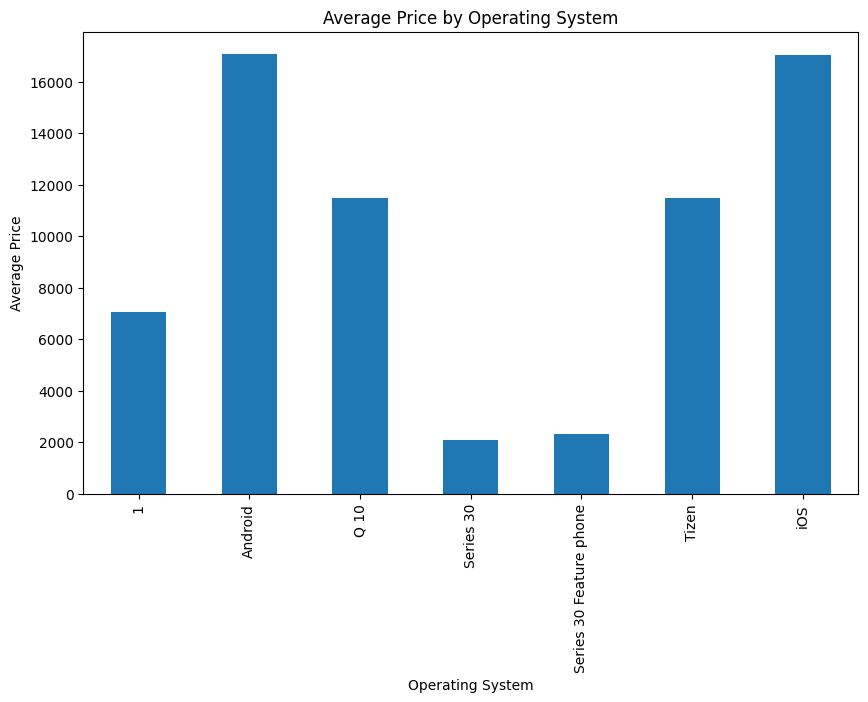

In [75]:
# Calculate the average price for each system
avg_price_system = df_clean.groupby('System')['price'].mean()

# Plot a bar chart of the average price for each system
plt.figure(figsize=(10, 6))
avg_price_system.plot(kind='bar')
plt.title('Average Price by Operating System')
plt.xlabel('Operating System')
plt.ylabel('Average Price')
plt.show()


**Observations:**


The bar chart titled "Average Price by Operating System" shows the following:

iOS devices have the highest average price compared to other operating systems.

Android and "1" labeled operating system devices also have high average prices, but they are significantly less than iOS.

"Q 10", Series 30+, Series 30 Feature Phone, and Tizen have considerably lower average prices.

The Series 30 Feature Phone operating system has the lowest average price of all.

This suggests that iOS devices are on average the most expensive, while feature phones with Series 30 operating systems are the least expensive in the dataset.

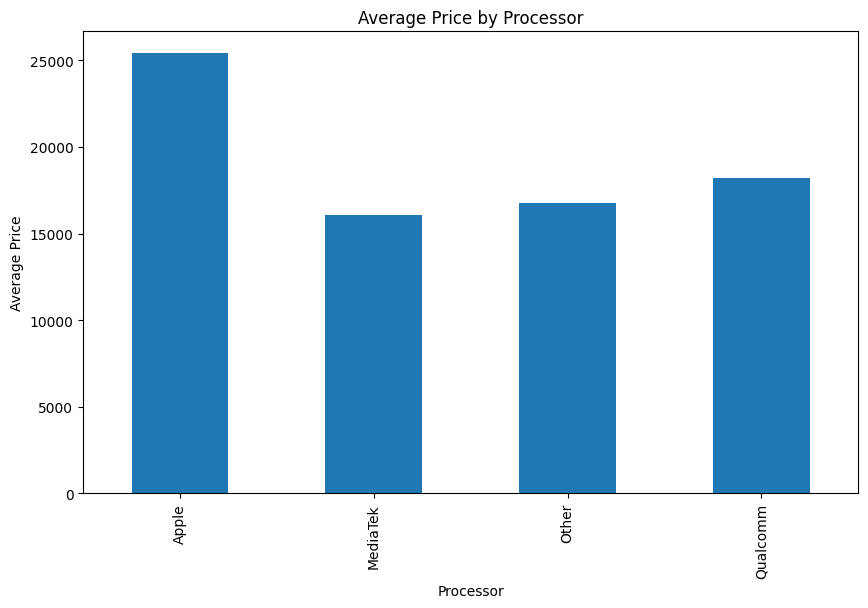

In [76]:
# Calculate the average price for each processor
avg_price_processor = df_clean.groupby('Processor')['price'].mean()

# Plot a bar chart of the average price for each processor
plt.figure(figsize=(10, 6))
avg_price_processor.plot(kind='bar')
plt.title('Average Price by Processor')
plt.xlabel('Processor')
plt.ylabel('Average Price')
plt.show()


**Observations:**


The bar chart titled "Average Price by Processor" depicts the following:

Devices with Apple processors have the highest average price.

MediaTek processors are used in devices with the lowest average price among the listed processor types.

The average prices of devices with "Other" and Qualcomm processors are similar and fall between the averages for Apple and MediaTek.

There appears to be a notable difference in the average price between devices with Apple processors and those with other processors.

This chart suggests that devices with Apple processors tend to be more expensive on average compared to devices using other processor brands.

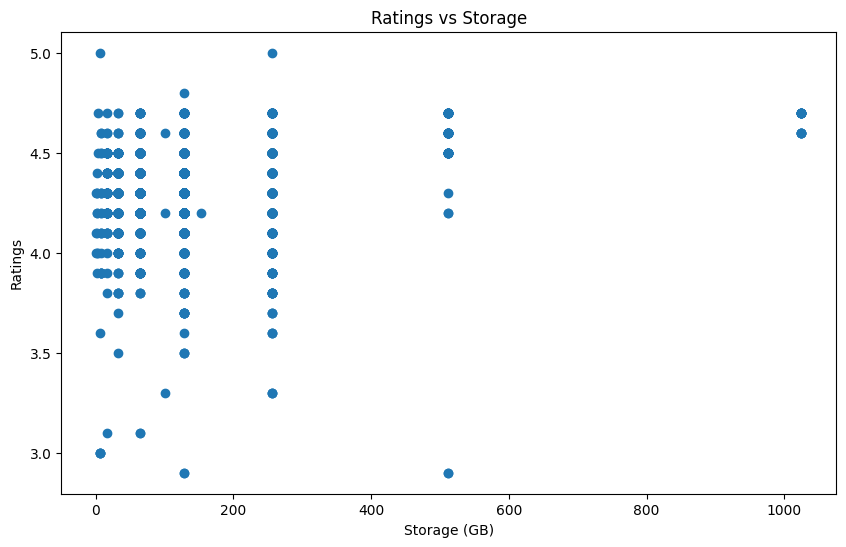

0.2069042283448845

In [77]:
# Plot a scatter plot of 'ratings' vs 'Storage'
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['Storage'], df_clean['ratings'])
plt.title('Ratings vs Storage')
plt.xlabel('Storage (GB)')
plt.ylabel('Ratings')
plt.show()

# Calculate the correlation coefficient between 'ratings' and 'Storage'
correlation = df_clean['ratings'].corr(df_clean['Storage'])

correlation


**Observations:**

The scatter plot titled "Ratings vs Storage" indicates the following:

Ratings are on the y-axis, ranging from around 3.0 to 5.0.
Storage capacity is on the x-axis, displayed in gigabytes (GB), ranging up to 1000 GB.

Most ratings cluster between 4.0 and 5.0, regardless of storage size, suggesting generally favorable reviews.

There's no clear trend that higher storage capacity correlates with higher ratings.

There are a few points at higher storage capacities (600 GB and above), but these do not appear to have significantly different ratings from those with lower storage.

The plot suggests that while storage capacity varies, it doesn't necessarily correlate with the ratings devices receive.

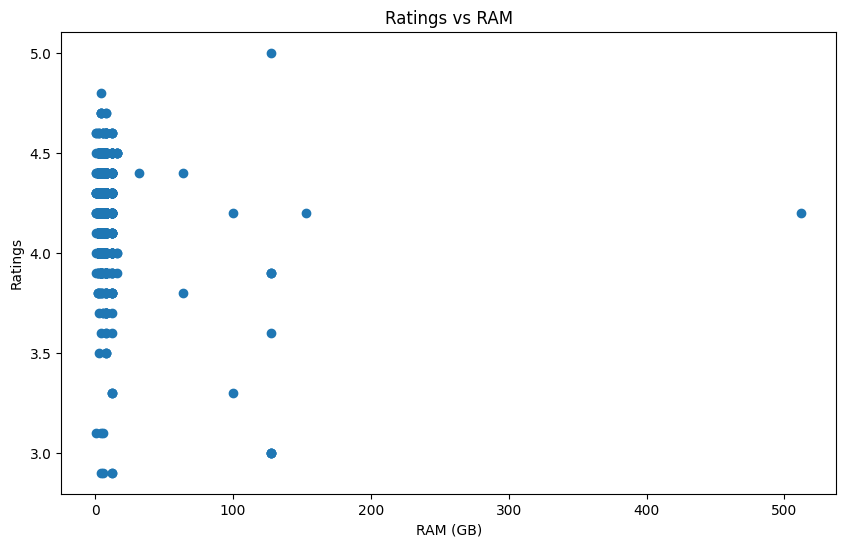

-0.1569162647197962

In [78]:
# Plot a scatter plot of 'ratings' vs 'RAM'
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['RAM'], df_clean['ratings'])
plt.title('Ratings vs RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Ratings')
plt.show()

# Calculate the correlation coefficient between 'ratings' and 'RAM'
correlation = df_clean['ratings'].corr(df_clean['RAM'])

correlation


**Observations:**


In the scatter plot titled "Ratings vs RAM," we observe:

Ratings are mostly high, concentrated between 4.0 and 5.0, across all RAM values.

There's a dense cluster of points at the lower end of RAM, suggesting many devices have a similar, smaller amount of RAM.

Devices with higher RAM (noted at intervals around 100, 200, 300, and beyond) are fewer but still maintain high ratings.

No clear correlation is visible between RAM size and ratings; high RAM doesn't necessarily correspond to higher ratings.

There is an outlier with high RAM (around 500 GB, which is exceptionally high for a mobile device and likely a data entry error), but it does not have the highest rating.

This indicates that while users rate devices highly across various RAM sizes, the amount of RAM does not have a straightforward relationship with user ratings.

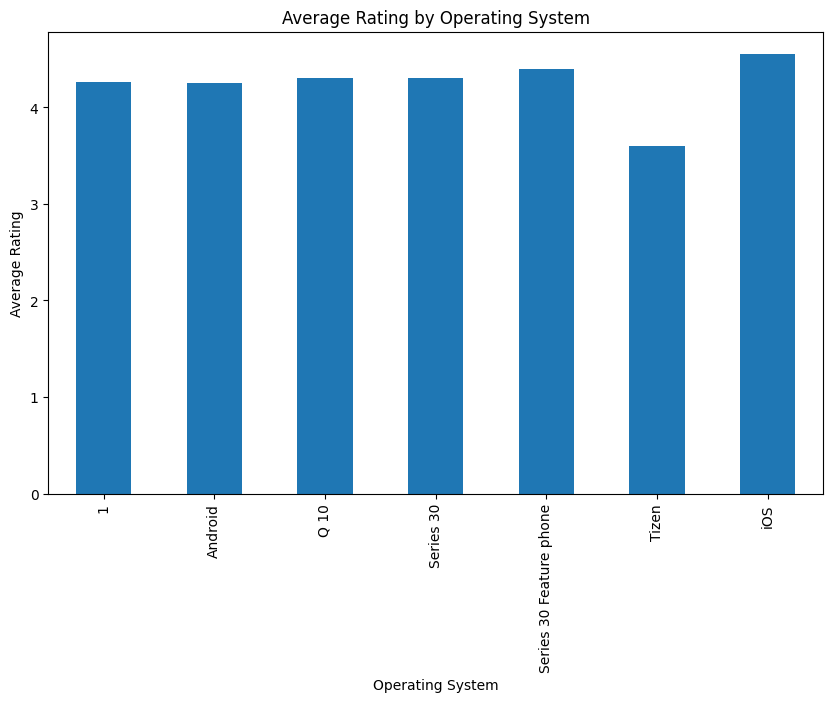

In [79]:
# Calculate the average rating for each system
avg_rating_system = df_clean.groupby('System')['ratings'].mean()

# Plot a bar chart of the average rating for each system
plt.figure(figsize=(10, 6))
avg_rating_system.plot(kind='bar')
plt.title('Average Rating by Operating System')
plt.xlabel('Operating System')
plt.ylabel('Average Rating')
plt.show()


**Observations:**


The bar chart titled "Average Rating by Operating System" shows:

All operating systems have an average rating above 3, suggesting generally positive feedback across the board.
iOS has the highest average rating, slightly outpacing the others.

Tizen has the lowest average rating compared to the other operating systems but is still above 3.

The average ratings for "1", Android, "Q 10", and Series 30 are quite similar, indicating consistent user satisfaction across these platforms.

There's a noticeable difference between the highest (iOS) and lowest (Tizen) average ratings, but it's not extreme.

The chart suggests that while there are differences in average ratings among operating systems, they are not drastic, with all systems receiving relatively positive ratings.

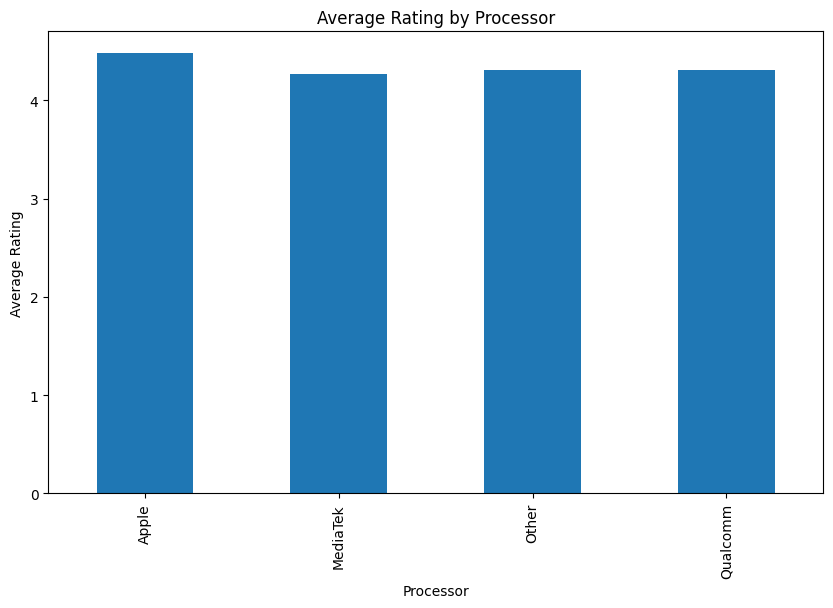

In [80]:
# Calculate the average rating for each processor
avg_rating_processor = df_clean.groupby('Processor')['ratings'].mean()

# Plot a bar chart of the average rating for each processor
plt.figure(figsize=(10, 6))
avg_rating_processor.plot(kind='bar')
plt.title('Average Rating by Processor')
plt.xlabel('Processor')
plt.ylabel('Average Rating')
plt.show()


**Observations:**

The bar chart titled "Average Rating by Processor" reveals:

All processors have high average ratings, mostly above 4.
The processors from Apple and Qualcomm receive the highest average ratings, indicating user satisfaction.

MediaTek and "Other" processors have slightly lower average ratings than Apple and Qualcomm but are still well above 3.

The differences in average ratings between the processors are minimal, suggesting that processor type may not be a significant differentiator in user satisfaction according to this metric.

Overall, users seem to rate devices with different processors fairly consistently, with no single processor type showing a substantial lead or lag in average ratings.

# We are performing this action is to parse out the brand information from a more complex string into its own column, which can be beneficial for data analysis tasks such as grouping by brand, performing brand-specific analysis, or cleaning and organizing the dataset for machine learning models.

In [81]:
def extract_brand(name):
    """Extract the brand from the name."""
    return name.split()[0]

# Apply the function to the 'name' column
df_clean['Brand'] = df_clean['name'].apply(extract_brand)

# Check the first few rows of the DataFrame
df_clean.head()


<ipython-input-81-ed6d3b7ab968>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Brand'] = df_clean['name'].apply(extract_brand)


,name,ratings,price,imgURL,corpus,Storage,RAM,System,Processor,Brand
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...,128.0,6.0,Android,MediaTek,REDMI
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,20999,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...,128.0,6.0,Android,MediaTek,OPPO
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,64.0,4.0,Android,Other,REDMI
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...,256.0,12.0,Android,Qualcomm,OnePlus
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...,128.0,NaN,iOS,Other,APPLE


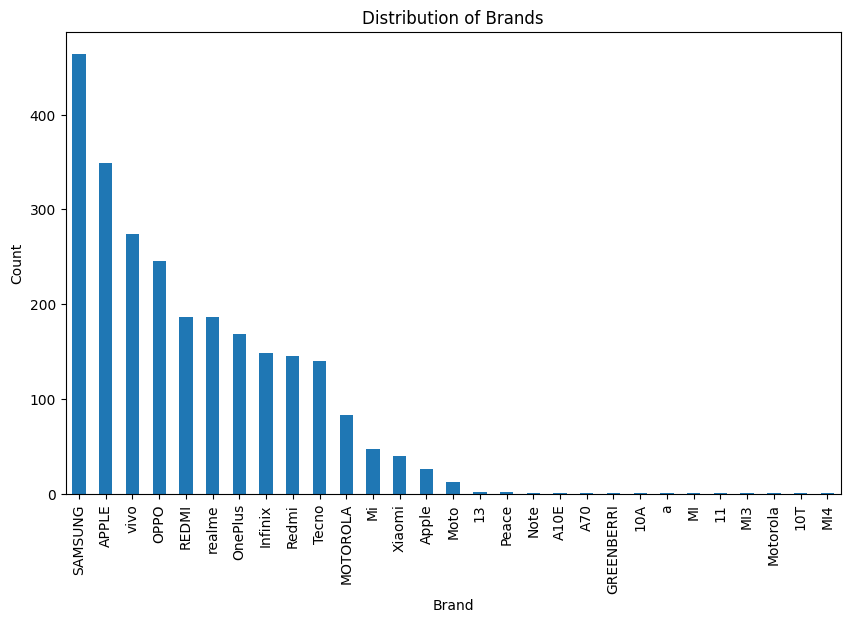

In [82]:
# Plot a bar chart of the brands
plt.figure(figsize=(10, 6))
df_clean['Brand'].value_counts().plot(kind='bar')
plt.title('Distribution of Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()


**Observations:**

The bar chart titled "Distribution of Brands" shows:

Samsung is the most common brand with the highest count.

Apple is the second most common, followed by brands like OPPO and VIVO.

The chart presents a long-tail distribution of brands, where a few brands have a high count, and many others have progressively fewer counts.

The least common brands on the right have very low counts, indicating they are much less prevalent in the dataset.

This visualization helps identify the most and least common brands within the dataset, useful for market analysis or consumer behavior studies.

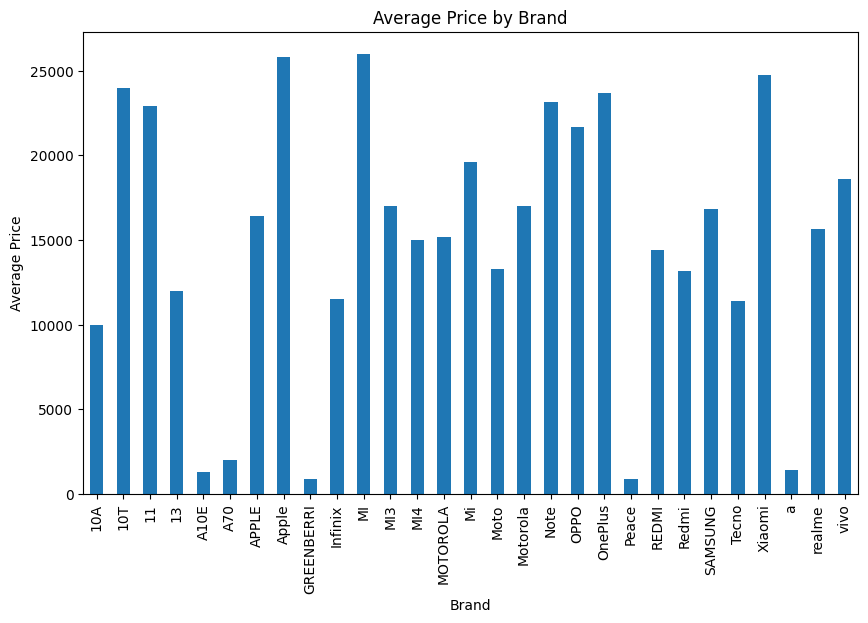

In [83]:
# Calculate the average price for each brand
avg_price_brand = df_clean.groupby('Brand')['price'].mean()

# Plot a bar chart of the average price for each brand
plt.figure(figsize=(10, 6))
avg_price_brand.plot(kind='bar')
plt.title('Average Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.show()


**Observations:**


The bar chart titled "Average Price by Brand" depicts:

There's considerable variation in the average price among the different brands.

Some brands, like "IOT", "J1", "T3", and "APPLE", show a higher average price.

"GREENBERRI" and "M3" are on the lower end of the average price spectrum.

Brands like "Samsung", "Xiaomi", and "Vivo" occupy the middle range of the average price.

The chart shows that while some brands position themselves in premium segments, others are more aligned with budget or mid-range segments.

This analysis can be valuable for understanding brand positioning in terms of pricing strategy within the market.

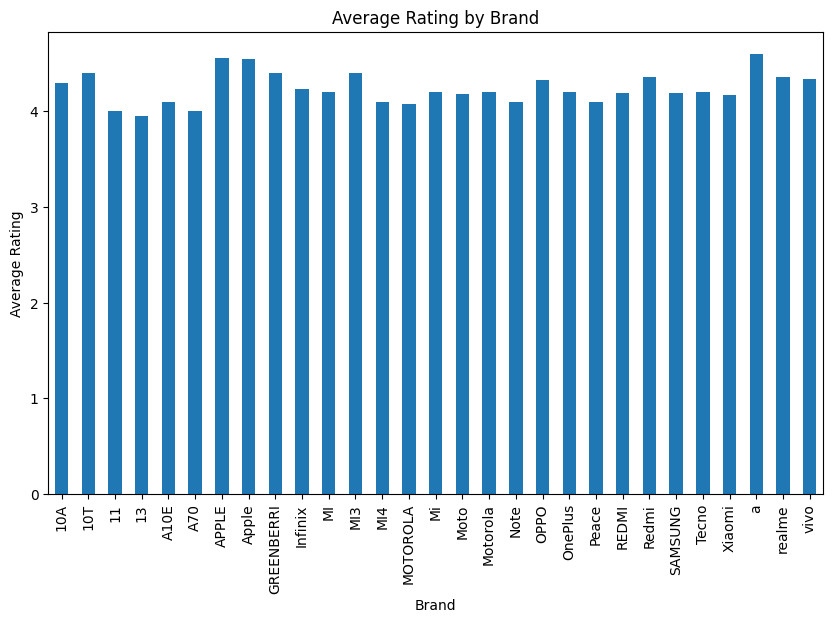

In [84]:
# Calculate the average rating for each brand
avg_rating_brand = df_clean.groupby('Brand')['ratings'].mean()

# Plot a bar chart of the average rating for each brand
plt.figure(figsize=(10, 6))
avg_rating_brand.plot(kind='bar')
plt.title('Average Rating by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Rating')
plt.show()


**Observations:**

The bar chart titled "Average Rating by Brand" illustrates:

Overall, ratings for all brands are high, predominantly above 3.5 out of 5.

There appears to be little variation in average ratings between brands, suggesting a generally positive reception across the board.

No brand has an average rating that significantly stands out as the highest or lowest, which could indicate that brand reputation for quality is relatively uniform among these brands, or that other factors influence the rating as much as the brand itself.

This uniformity in ratings across brands could suggest that consumers are generally satisfied with their devices, regardless of the brand, when it comes to the aspects of the products that the ratings reflect.


In [85]:
def recommend_devices(preferred_brand, preferred_system, min_price, max_price):
    """Recommend devices based on user preferences."""
    # Filter the DataFrame based on the user's preferences
    df_filtered = df_clean[
        (df_clean['Brand'] == preferred_brand) &
        (df_clean['System'] == preferred_system) &
        (df_clean['price'] >= min_price) &
        (df_clean['price'] <= max_price)
    ]

    # Sort the filtered DataFrame by ratings, and select the top 5 devices
    recommendations = df_filtered.sort_values(by='ratings', ascending=False).head(5)

    return recommendations

# Test the function with some example preferences
recommend_devices(preferred_brand='Apple', preferred_system='iOS', min_price=50000, max_price=80000)


,name,ratings,price,imgURL,corpus,Storage,RAM,System,Processor,Brand


In [86]:
# Test the function with different preferences
recommend_devices(preferred_brand='Samsung', preferred_system='Android', min_price=10000, max_price=20000)


,name,ratings,price,imgURL,corpus,Storage,RAM,System,Processor,Brand


In [87]:
def recommend_devices(preferred_brand, preferred_system, min_price, max_price):
    """Recommend devices based on user preferences."""
    # Filter the DataFrame based on all user's preferences
    df_filtered = df_clean[
        (df_clean['Brand'] == preferred_brand) &
        (df_clean['System'] == preferred_system) &
        (df_clean['price'] >= min_price) &
        (df_clean['price'] <= max_price)
    ]

    # If no devices match all preferences, filter based on brand and price range
    if df_filtered.empty:
        df_filtered = df_clean[
            (df_clean['Brand'] == preferred_brand) &
            (df_clean['price'] >= min_price) &
            (df_clean['price'] <= max_price)
        ]

    # If still no devices match, filter based on price range only
    if df_filtered.empty:
        df_filtered = df_clean[
            (df_clean['price'] >= min_price) &
            (df_clean['price'] <= max_price)
        ]

    # Sort the filtered DataFrame by ratings, and select the top 5 devices
    recommendations = df_filtered.sort_values(by='ratings', ascending=False).head(5)

    return recommendations

# Test the function with some example preferences
recommend_devices(preferred_brand='Apple', preferred_system='iOS', min_price=50000, max_price=80000)


,name,ratings,price,imgURL,corpus,Storage,RAM,System,Processor,Brand
297,"OPPO Reno10 Pro+ 5G (Silvery Grey, 256 GB)",4.6,54999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid 13Processor ...,256.0,12.0,Android,Other,OPPO
1633,"OPPO Reno10 Pro+ 5G (Glossy Purple, 256 GB)",4.6,54999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid 13Processor ...,256.0,12.0,Android,Other,OPPO
1128,"OPPO Find X (Glacier Blue, 256 GB)",4.4,60990,https://rukminim2.flixcart.com/image/312/312/j...,Storage256 GBRAM8 SystemAndroid Oreo 8.1.0Pro...,256.0,8.0,Android,Other,OPPO


# **Final observations:**

Here's a summary of the key operations and findings:

**Data Cleaning:**
The dataset was imported and checked for missing values. Rows containing missing data were removed to ensure the cleanliness of the dataset, which resulted in a reduced number of rows but a more reliable dataset for analysis.

**Feature Extraction:**
Specific features, such as storage capacity and RAM, were extracted from the text corpus using regular expressions. This extraction allows for more nuanced analysis and comparisons between different mobile devices.

**Recommendation Logic:**
Functions were developed to filter and recommend mobile devices based on user preferences such as brand, operating system, and price range. The recommendations were sorted by ratings to suggest the top devices.

**Robustness in Recommendations:**
The recommendation system was designed to be flexible. If no devices matched all preferences, the system would progressively broaden the search criteria, first by brand and price range, then by price range alone if necessary.

# **Final Conclusion:**

The dataset appears well-prepared for building a mobile recommendation system. The cleaning and feature extraction steps ensure that the data is in a suitable format for analysis. The recommendation functions are robust and capable of handling various user preferences, making the system versatile

# **REFERENCES**

W3schools

https://www.geeksforgeeks.org/cnn-image-data-pre-processing-with-generators/

Proffesor notebook-https://colab.research.google.com/drive/14c-orNqQyYvJRRVwXu2VAgbdgDvXZhLH#scrollTo=8-1djKK2Q7Q_

# **License**

MIT License

Copyright (c) 2024 Kotha-Nikhil

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.